In [1]:
#Importando algumas bibliotecas básicas para manipular alguns dados
import os
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
from pandas import read_excel
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import scipy.stats as stats
import statsmodels.api as sm
import random
import math
import sklearn

In [2]:
cardio= pd.read_csv('C:/Users/Eden/Documents/PUC-MG - Inteligência Artifical e Aprendizado de Máquina/EG/Cardio/cardio_IA.csv', 
                         sep=';', encoding='latin-1', low_memory = False) 

In [3]:
#lendo as cinco primeiras linhas
cardio.head()

,ID,Idade,Sexo,IMC,ccintura,cquadril,frqCardiaca,fumo,atvFisica,stress,pdiasto,DoencaCard
0,1,20,Masculino,27.94,95,112,75,0,2,3,80.00,0
1,2,31,Feminino,28.76,88,101,66,0,2,0,74.33,1
2,3,19,Masculino,25.35,79,102,69,0,2,0,70.00,0
3,4,20,Masculino,20.73,91,80,85,0,0,0,76.67,1
4,5,19,Masculino,24.54,83,98,72,0,2,0,80.00,1


In [4]:
#lendo as últimas cinco linhas
cardio.tail()

,ID,Idade,Sexo,IMC,ccintura,cquadril,frqCardiaca,fumo,atvFisica,stress,pdiasto,DoencaCard
395,396,21,Masculino,17.67,65,88,59,0,0,0,82.67,1
396,397,21,Masculino,22.35,80,103,80,0,2,2,70.00,0
397,398,21,Masculino,32.11,97,112,65,0,2,0,101.00,1
398,399,19,Masculino,23.16,82,101,81,0,0,1,96.67,1
399,400,18,Feminino,25.93,72,104,98,0,0,1,76.67,0


In [5]:
#função que verifica se existem colunas com valores vazios
for col in (cardio):
    if(cardio[col].isnull().any()):
        print(col)

In [6]:
#Nova classificação binária para classificação de sexo
def mapeamento(Sexo):
    if Sexo == 'Masculino':
        return 1
    else:
        return 0

In [7]:
#Aplicando a nova coluna
cardio['Sexo_n'] = cardio['Sexo'].apply(mapeamento)

In [8]:
#Deletando coluna ID e lendo os novos dados
cardio.drop("ID",axis=1,inplace=True)
cardio.head()

,Idade,Sexo,IMC,ccintura,cquadril,frqCardiaca,fumo,atvFisica,stress,pdiasto,DoencaCard,Sexo_n
0,20,Masculino,27.94,95,112,75,0,2,3,80.00,0,1
1,31,Feminino,28.76,88,101,66,0,2,0,74.33,1,0
2,19,Masculino,25.35,79,102,69,0,2,0,70.00,0,1
3,20,Masculino,20.73,91,80,85,0,0,0,76.67,1,1
4,19,Masculino,24.54,83,98,72,0,2,0,80.00,1,1


In [9]:
#Verificando se existem dados duplicados
cardio[cardio.duplicated(keep=False)]

,Idade,Sexo,IMC,ccintura,cquadril,frqCardiaca,fumo,atvFisica,stress,pdiasto,DoencaCard,Sexo_n


In [10]:
#Estatísticas descritivas Idade
print('Média: {}'.format(round(st.mean(cardio['Idade']),2)))
print('Moda: {}'.format(round(st.mode(cardio['Idade']),2)))
print('Mediana: {}'.format(round(st.median(cardio['Idade']),2)))
print('Variância: {}'.format(round(st.variance(cardio['Idade']),2)))
print('Desvio Padrão: {}'.format(round(st.stdev(cardio['Idade']),2)))

Média: 23.14
Moda: 19
Mediana: 21.0
Variância: 36.37
Desvio Padrão: 6.03


In [11]:
#Estatísticas descritivas IMC
print('Média: {}'.format(round(st.mean(cardio['IMC']),2)))
#print('Moda: {}'.format(round(st.mode(cardio['IMC']),2)))
print('Mediana: {}'.format(round(st.median(cardio['IMC']),2)))
print('Variância: {}'.format(round(st.variance(cardio['IMC']),2)))
print('Desvio Padrão: {}'.format(round(st.stdev(cardio['IMC']),2)))

Média: 24.0
Mediana: 23.32
Variância: 18.25
Desvio Padrão: 4.27


In [12]:
#Estatísticas descritivas ccintura
print('Média: {}'.format(round(st.mean(cardio['ccintura']),2)))
#print('Moda: {}'.format(round(st.mode(cardio['IMC']),2)))
print('Mediana: {}'.format(round(st.median(cardio['ccintura']),2)))
print('Variância: {}'.format(round(st.variance(cardio['ccintura']),2)))
print('Desvio Padrão: {}'.format(round(st.stdev(cardio['ccintura']),2)))

Média: 80.94
Mediana: 79.0
Variância: 128.24
Desvio Padrão: 11.32


In [13]:
#Estatísticas descritivas cquadril
print('Média: {}'.format(round(st.mean(cardio['cquadril']),2)))
#print('Moda: {}'.format(round(st.mode(cardio['IMC']),2)))
print('Mediana: {}'.format(round(st.median(cardio['cquadril']),2)))
print('Variância: {}'.format(round(st.variance(cardio['cquadril']),2)))
print('Desvio Padrão: {}'.format(round(st.stdev(cardio['cquadril']),2)))

Média: 101.68
Mediana: 101.0
Variância: 79.33
Desvio Padrão: 8.91


In [14]:
#Estatísticas descritivas frqCardiaca
print('Média: {}'.format(round(st.mean(cardio['frqCardiaca']),2)))
print('Moda: {}'.format(round(st.mode(cardio['frqCardiaca']),2)))
print('Mediana: {}'.format(round(st.median(cardio['frqCardiaca']),2)))
print('Variância: {}'.format(round(st.variance(cardio['frqCardiaca']),2)))
print('Desvio Padrão: {}'.format(round(st.stdev(cardio['frqCardiaca']),2)))

Média: 79.82
Moda: 80
Mediana: 80.0
Variância: 138.94
Desvio Padrão: 11.79


In [15]:
#Estatísticas descritivas fumo
print('Média: {}'.format(round(st.mean(cardio['fumo']),2)))
print('Moda: {}'.format(round(st.mode(cardio['fumo']),2)))
print('Mediana: {}'.format(round(st.median(cardio['fumo']),2)))
print('Variância: {}'.format(round(st.variance(cardio['fumo']),2)))
print('Desvio Padrão: {}'.format(round(st.stdev(cardio['fumo']),2)))

Média: 0.02
Moda: 0
Mediana: 0.0
Variância: 0.02
Desvio Padrão: 0.13


In [16]:
#Estatísticas descritivas fumo
print('Média: {}'.format(round(st.mean(cardio['atvFisica']),2)))
print('Moda: {}'.format(round(st.mode(cardio['atvFisica']),2)))
print('Mediana: {}'.format(round(st.median(cardio['atvFisica']),2)))
print('Variância: {}'.format(round(st.variance(cardio['atvFisica']),2)))
print('Desvio Padrão: {}'.format(round(st.stdev(cardio['atvFisica']),2)))

Média: 1.09
Moda: 2
Mediana: 1.0
Variância: 0.82
Desvio Padrão: 0.9


In [17]:
#Estatísticas descritivas stress
print('Média: {}'.format(round(st.mean(cardio['stress']),2)))
print('Moda: {}'.format(round(st.mode(cardio['stress']),2)))
print('Mediana: {}'.format(round(st.median(cardio['stress']),2)))
print('Variância: {}'.format(round(st.variance(cardio['stress']),2)))
print('Desvio Padrão: {}'.format(round(st.stdev(cardio['stress']),2)))

Média: 1.26
Moda: 0
Mediana: 1.0
Variância: 1.74
Desvio Padrão: 1.32


In [18]:
#Estatísticas descritivas pdiasto
print('Média: {}'.format(round(st.mean(cardio['pdiasto']),2)))
#print('Moda: {}'.format(round(st.mode(cardio['pdiasto']),2)))
print('Mediana: {}'.format(round(st.median(cardio['pdiasto']),2)))
print('Variância: {}'.format(round(st.variance(cardio['pdiasto']),2)))
print('Desvio Padrão: {}'.format(round(st.stdev(cardio['pdiasto']),2)))

Média: 79.11
Mediana: 78.33
Variância: 151.67
Desvio Padrão: 12.32


In [19]:
#Estatísticas descritivas Doença Card
print('Média: {}'.format(round(st.mean(cardio['DoencaCard']),2)))
print('Moda: {}'.format(round(st.mode(cardio['DoencaCard']),2)))
print('Mediana: {}'.format(round(st.median(cardio['DoencaCard']),2)))
print('Variância: {}'.format(round(st.variance(cardio['DoencaCard']),2)))
print('Desvio Padrão: {}'.format(round(st.stdev(cardio['DoencaCard']),2)))

Média: 0.58
Moda: 1
Mediana: 1.0
Variância: 0.24
Desvio Padrão: 0.49


In [20]:
#Estatísticas descritivas Sexo_n
print('Média: {}'.format(round(st.mean(cardio['Sexo_n']),2)))
print('Moda: {}'.format(round(st.mode(cardio['Sexo_n']),2)))
print('Mediana: {}'.format(round(st.median(cardio['Sexo_n']),2)))
print('Variância: {}'.format(round(st.variance(cardio['Sexo_n']),2)))
print('Desvio Padrão: {}'.format(round(st.stdev(cardio['Sexo_n']),2)))

Média: 0.44
Moda: 0
Mediana: 0.0
Variância: 0.25
Desvio Padrão: 0.5


In [21]:
#Frequência cruzada entre doença cardíaca versus as variáveis qualitativas,
#Doença cardiáca vs Sexo
pd.crosstab(cardio['Sexo'],cardio['DoencaCard'],normalize=True)*100

DoencaCard,0,1
Sexo,,
Feminino,32.5,23.75
Masculino,9.0,34.75


In [22]:
#Doença cardiáca  vs Fumantes e não fumantes
pd.crosstab(cardio['fumo'],cardio['DoencaCard'],normalize=True)*100

DoencaCard,0,1
fumo,,
0,40.5,57.75
1,1.0,0.75


In [23]:
#Doença cardiáca  vs frequência semanal de atividade física
pd.crosstab(cardio['atvFisica'],cardio['DoencaCard'],normalize=True)*100

DoencaCard,0,1
atvFisica,,
0,17.00,19.75
1,6.75,10.75
2,17.75,28.00


In [24]:
#Doença cardiáca  vs nível de stress
pd.crosstab(cardio['stress'],cardio['DoencaCard'],normalize=True)*100

DoencaCard,0,1
stress,,
0,14.00,30.50
1,5.25,4.75
2,11.75,16.75
3,5.75,3.50
4,4.75,3.00


In [25]:
#https://www.kaggle.com/neisha/heart-disease-prediction-using-logistic-regression

In [26]:
#Criando novo dataset 
cardio_n = cardio[['Idade','IMC','ccintura',
                   'cquadril','frqCardiaca','fumo','atvFisica','stress','pdiasto','DoencaCard','Sexo_n']]

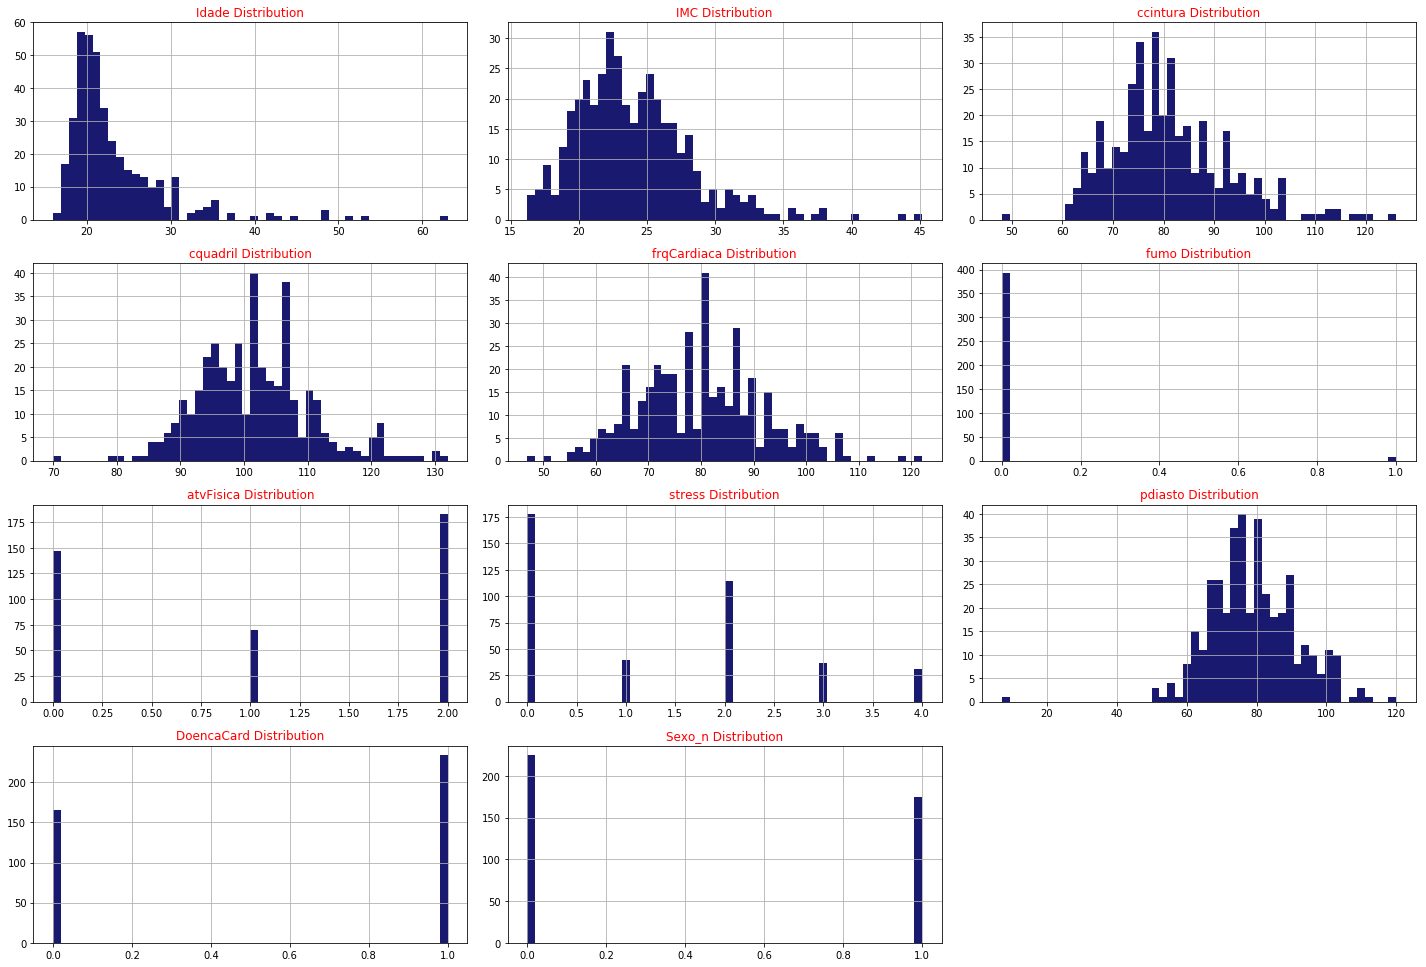

In [27]:
#Função que cria múltiplos histogramas para analisar a distribuição de cada coluna
def draw_histograms(cardio_n, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        cardio_n[feature].hist(bins=50,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='Red')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(cardio_n,cardio_n.columns,6,3)

In [28]:
#Criando os intervalos de confiança
from scipy.stats import norm

In [29]:
#99% de confiança
norm.ppf(0.995)

2.5758293035489004

In [30]:
#Parametrizando os dados para a construção do intervalo de confiança
n = len(cardio_n)
con_coef = 0.995
alpha = 1 - con_coef

In [31]:
#Criando as colunas para o calculo dos intervalos de confiança
x_bar_idade = cardio_n['Idade'].mean()
sigma_idade = cardio_n['Idade'].std()

x_bar_imc = cardio_n['IMC'].mean()
sigma_imc = cardio_n['IMC'].std()

x_bar_ccintura = cardio_n['ccintura'].mean()
sigma_ccintura = cardio_n['ccintura'].std()

x_bar_cquadril = cardio_n['cquadril'].mean()
sigma_cquadril = cardio_n['cquadril'].std()

x_bar_frqCardiaca= cardio_n['frqCardiaca'].mean()
sigma_frqCardiaca = cardio_n['frqCardiaca'].std()

x_bar_pdiasto = cardio_n['pdiasto'].mean()
sigma_pdiasto = cardio_n['pdiasto'].std()


In [32]:
x_bar_idade, sigma_idade

(23.14, 6.030449053716785)

In [33]:
z_critical = stats.norm.ppf(q=0.995)
z_critical

2.5758293035489004

In [34]:
zinterval = stats.norm.interval(alpha=con_coef)
zinterval

(-2.807033768343804, 2.807033768343811)

In [35]:
#Calculo dos valores de erro padrão para cada coluna
standard_error_idade = sigma_idade/math.sqrt(n)

standard_error_imc = sigma_imc/math.sqrt(n)

standard_error_ccintura = sigma_ccintura/math.sqrt(n)

standard_error_cquadril= sigma_cquadril/math.sqrt(n)

standard_error_frqCardiaca= sigma_frqCardiaca/math.sqrt(n)

standard_error_pdiasto= sigma_pdiasto/math.sqrt(n)

In [36]:
#Saída do cálculo do erro padrão
standard_error_idade, standard_error_imc, standard_error_ccintura, standard_error_cquadril, standard_error_frqCardiaca, standard_error_pdiasto

(0.3015224526858392,
 0.21357509989269094,
 0.5662185497802843,
 0.44532293413225454,
 0.5893639577431896,
 0.615764011727787)

In [37]:
#Cálculo dos limites superiores e inferiores das caudas com 99% de confiança
idade_lower = x_bar_idade - z_critical * standard_error_idade
idade_upper = x_bar_idade + z_critical * standard_error_idade

imc_lower = x_bar_imc - z_critical * standard_error_imc
imc_upper = x_bar_imc + z_critical * standard_error_imc

ccintura_lower = x_bar_ccintura - z_critical * standard_error_ccintura
ccintura_upper = x_bar_ccintura + z_critical * standard_error_ccintura

cquadril_lower = x_bar_cquadril - z_critical * standard_error_cquadril
cquadril_upper = x_bar_cquadril + z_critical * standard_error_cquadril

frqCardiaca_lower = x_bar_frqCardiaca - z_critical * standard_error_frqCardiaca
frqCardiaca_upper = x_bar_frqCardiaca + z_critical * standard_error_frqCardiaca

pdiasto_lower = x_bar_frqCardiaca - z_critical * standard_error_pdiasto
pdiasto_upper = x_bar_frqCardiaca + z_critical * standard_error_pdiasto

In [38]:
idade_lower, idade_upper, cquadril_lower, cquadril_upper

(22.36332963069388, 23.91667036930612, 100.53542413671977, 102.82957586328024)

In [39]:
ic = {'IC_Idade': [idade_lower, idade_upper],
      'IC_IMC':   [imc_lower, imc_upper],
      'IC_ccintura':   [ccintura_lower, ccintura_upper],
      'IC_cquadril':   [cquadril_lower, cquadril_upper],
      'IC_frqCardiaca':   [frqCardiaca_lower, frqCardiaca_upper],
      'IC_pdiasto':   [pdiasto_lower, pdiasto_upper]
        }

df_ic = pd.DataFrame (ic, index =['Intervalo Baixo', '  Intervalo Alto'], columns = ['IC_Idade', 'IC_IMC', 'IC_ccintura', 
                                                                                 'IC_cquadril', 'IC_frqCardiaca', 'IC_pdiasto'])

In [40]:
#Intervalo de confiança criado
df_ic.head()

,IC_Idade,IC_IMC,IC_ccintura,IC_cquadril,IC_frqCardiaca,IC_pdiasto
Intervalo Baixo,22.36333,23.444942,79.476518,100.535424,78.301899,78.233897
Intervalo Alto,23.91667,24.545208,82.393482,102.829576,81.338101,81.406103


In [41]:
#Transpondo a matriz do intervalo de confiança
df_ic.T

,Intervalo Baixo,Intervalo Alto
IC_Idade,22.363330,23.916670
IC_IMC,23.444942,24.545208
IC_ccintura,79.476518,82.393482
IC_cquadril,100.535424,102.829576
IC_frqCardiaca,78.301899,81.338101
IC_pdiasto,78.233897,81.406103


In [42]:
#Matriz de correlação
corr = cardio_n.corr()
corr

,Idade,IMC,ccintura,cquadril,frqCardiaca,fumo,atvFisica,stress,pdiasto,DoencaCard,Sexo_n
Idade,1.000000,0.200772,0.255931,0.126026,-0.101436,0.063374,-0.117586,-0.000448,0.195743,0.060857,0.097479
IMC,0.200772,1.000000,0.845674,0.832651,0.121858,0.059950,-0.027868,-0.002126,0.303754,0.261322,0.198221
ccintura,0.255931,0.845674,1.000000,0.747500,0.089398,0.059767,-0.043693,-0.067081,0.300848,0.287204,0.399846
cquadril,0.126026,0.832651,0.747500,1.000000,0.134743,0.047631,-0.004220,0.018947,0.254350,0.182695,0.123824
frqCardiaca,-0.101436,0.121858,0.089398,0.134743,1.000000,-0.062740,-0.157542,0.059804,0.091573,0.036686,-0.155605
fumo,0.063374,0.059950,0.059767,0.047631,-0.062740,1.000000,-0.013290,0.031843,-0.027596,-0.042371,-0.040835
atvFisica,-0.117586,-0.027868,-0.043693,-0.004220,-0.157542,-0.013290,1.000000,-0.189769,-0.019738,0.067028,0.202122
stress,-0.000448,-0.002126,-0.067081,0.018947,0.059804,0.031843,-0.189769,1.000000,-0.091859,-0.197652,-0.256860
pdiasto,0.195743,0.303754,0.300848,0.254350,0.091573,-0.027596,-0.019738,-0.091859,1.000000,0.606290,0.260394
DoencaCard,0.060857,0.261322,0.287204,0.182695,0.036686,-0.042371,0.067028,-0.197652,0.606290,1.000000,0.374598


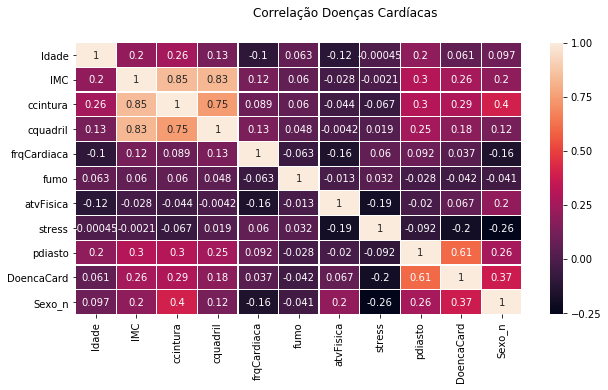

In [43]:
#Correlação de multiplas variáveis
%matplotlib inline
import seaborn as sns
fig = plt.figure(figsize=(10,5))
fig.suptitle('Correlação Doenças Cardíacas')
#plt.figure(figsize=(5,5))
sns.heatmap(corr, annot = True, linewidth=0.2)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


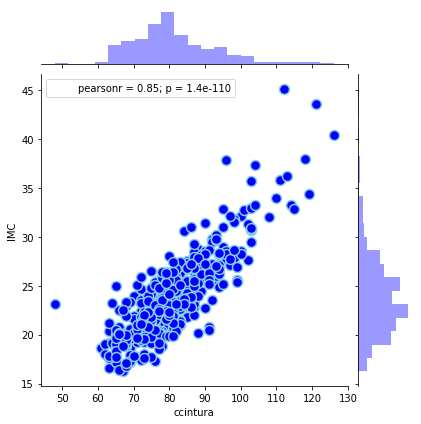

In [44]:
#Gráfico de correlação entre IMC e Circunferência da cintura
sns.jointplot(x=cardio_n["ccintura"], y=cardio_n["IMC"], kind='scatter', s=100, color='b', 
              edgecolor="skyblue", linewidth=1.5).annotate(stats.pearsonr)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


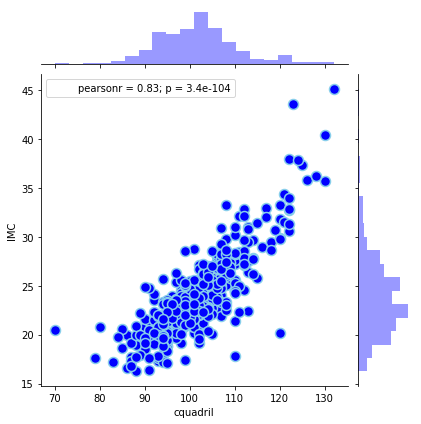

In [45]:
#Gráfico de correlação entre IMC e Circunferência do quadril
sns.jointplot(x=cardio_n["cquadril"], y=cardio_n["IMC"], kind='scatter', s=100, color='b', 
              edgecolor="skyblue", linewidth=1.5).annotate(stats.pearsonr)

In [55]:
#Criando variáveis para a equação de regressão linear
x = cardio_n["ccintura"] 
y = cardio_n["IMC"]

# Argumentos para o modelo de regressão
x = sm.add_constant(x) #constante
model = sm.OLS(y, x).fit()
predictions = model.predict(x) # saída do modelo de predição


# Imprimir estatísticas
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    IMC   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     999.3
Date:                Thu, 16 Jan 2020   Prob (F-statistic):          1.37e-110
Time:                        21:14:24   Log-Likelihood:                -896.69
No. Observations:                 400   AIC:                             1797.
Df Residuals:                     398   BIC:                             1805.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8219      0.825     -2.209      0.028      -3.443      -0.201
ccintura       0.3190      0.010     31.612      0.000       0.299       0.339
==============================================================================
Omnibus:                       48.680   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.017
Skew:                           0.609   Prob(JB):                     8.68e-27
Kurtosis:                       5.391   Cond. No.                         591.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

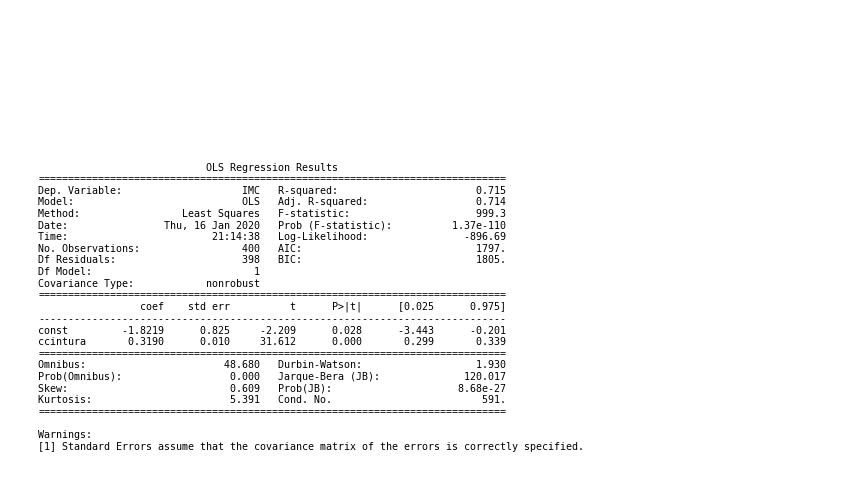

In [56]:
#Salva os resultados da regressão elaborada
plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('output.png')

In [57]:
#Visualizando os parâmetros do modelo de regressão linear
model.params

const      -1.821942
ccintura    0.318985
dtype: float64